In [19]:
import librosa
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
import numpy as np 
from scipy.signal import tf2zpk
import soundfile as sf
from my_functions import lms, plot_weights_evolution, normalize, find_max_step_size, analyze_frequencies, plot_signals
from sklearn.metrics import mean_squared_error
from scipy.signal import butter, filtfilt
sampling_rate = 16000
anechoic_audio_impulse_response_convolution_plus_noise = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio_impulse_response_convolution_plus_noise.npy")
anechoic_audio_impulse_response_convolution = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio_impulse_response_convolution.npy")
anechoic_audio_plus_noise = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio_plus_noise.npy")
anechoic_audio = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio.npy")
impulse_response = np.load("/workspace/unicamp/IA009/Projeto Final/data/impulse_response.npy")
impulse_response = impulse_response[:20000]
anechoic_audio_impulse_response_convolution = np.convolve(anechoic_audio, impulse_response, mode="full")
noise = np.load("/workspace/unicamp/IA009/Projeto Final/data/noise.npy")


# cutoff_freq = 1500

# nyquist = 0.5 * sampling_rate  # Nyquist frequency
# normalized_cutoff = cutoff_freq / nyquist  # Normalize cutoff frequency
# b, a = butter(N=4, Wn=normalized_cutoff, btype='low', analog=False)
# anechoic_audio = filtfilt(b, a, anechoic_audio)
# anechoic_audio_impulse_response_convolution = filtfilt(b, a, anechoic_audio_impulse_response_convolution)

# new_sampling_rate = 8000
# anechoic_audio = librosa.resample(anechoic_audio, orig_sr=sampling_rate, target_sr=new_sampling_rate)
# anechoic_audio_impulse_response_convolution = librosa.resample(anechoic_audio_impulse_response_convolution, orig_sr=sampling_rate, target_sr=new_sampling_rate)

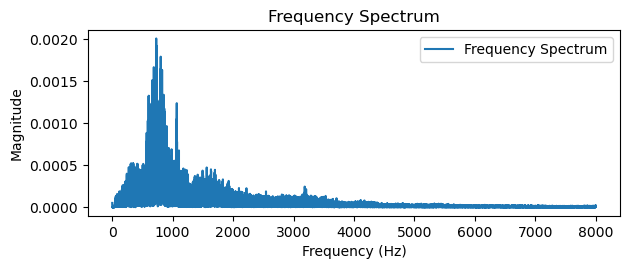

In [20]:
freqs, magnitudes = analyze_frequencies(noise, 16000)

# Plot frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(freqs, magnitudes, label="Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.legend()
plt.tight_layout()
plt.show()

# Applying the LMS on the anechoic audio signal

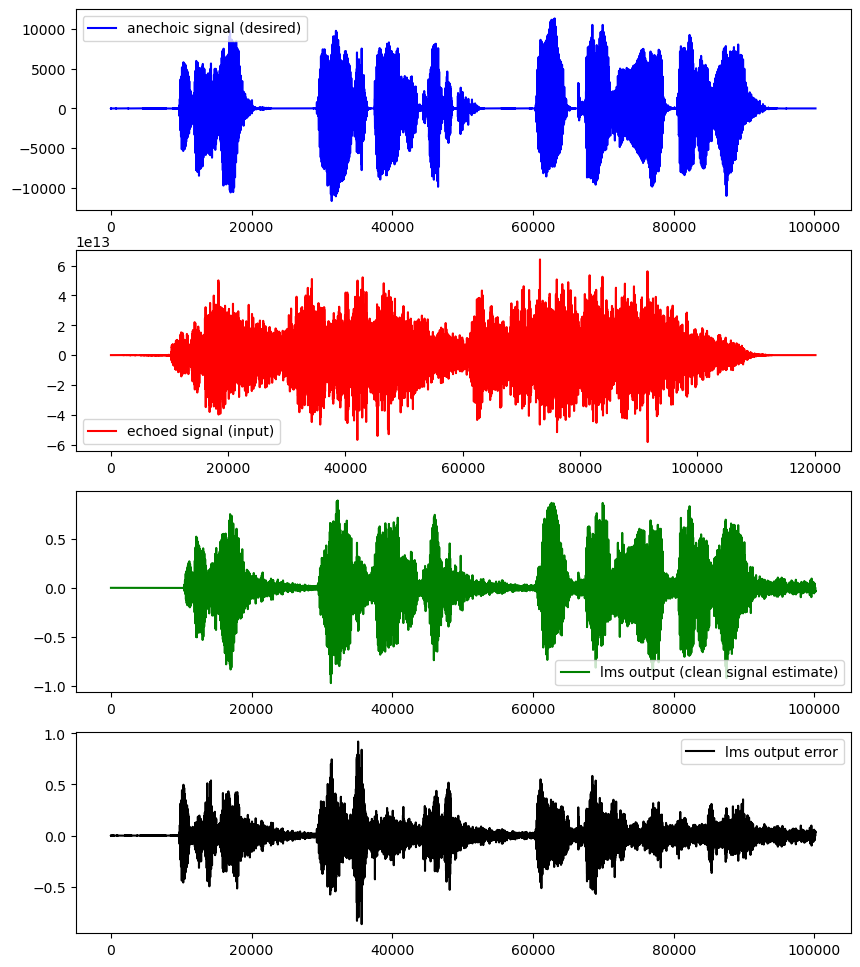

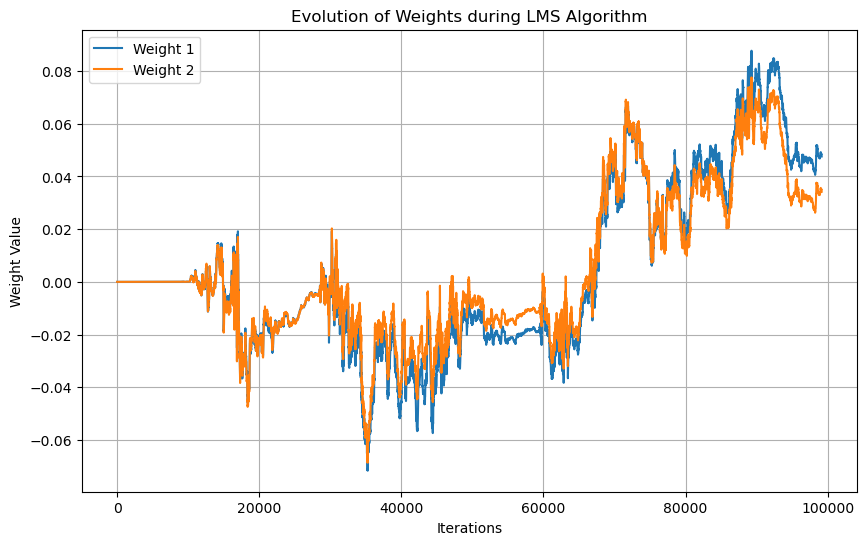

ECHO MSE: 1.5419292171501566e+26
MSE: 0.008298772996642343


In [21]:
filtering_order = 1000
step_size = 0.01

output, weights, weights_evolution, error = lms(anechoic_audio, anechoic_audio_impulse_response_convolution, step_size, filtering_order)
error = normalize(anechoic_audio) - normalize(output)
fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(anechoic_audio, color='blue', label='anechoic signal (desired)')
ax[0].legend()
ax[1].plot(anechoic_audio_impulse_response_convolution, color='red', label='echoed signal (input)')
ax[1].legend()
ax[2].plot(output, color='green', label='lms output (clean signal estimate)')
ax[2].legend()
ax[3].plot(error, color='black', label='lms output error')
ax[3].legend()
plot_weights_evolution(weights_evolution)
sf.write("anechoic_audio.wav", anechoic_audio, 8000)
sf.write("anechoic_audio_impulse_response_convolution.wav", normalize(anechoic_audio_impulse_response_convolution), 8000)
sf.write("lms_output_audio.wav", output, 8000)
print(f"ECHO MSE: {np.mean((anechoic_audio_impulse_response_convolution[:len(anechoic_audio)] - anechoic_audio)**2)}")
print(f"MSE: {np.mean(error**2)}")

In [ ]:
filtering_order = 1000
step_size = 0.01

output, weights, weights_evolution, error = lms(anechoic_audio, anechoic_audio_plus_noise, step_size, filtering_order)

fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(anechoic_audio, color='blue', label='anechoic signal (desired)')
ax[0].legend()
ax[1].plot(anechoic_audio_plus_noise, color='red', label='noisy signal (input)')
ax[1].legend()
ax[2].plot(output, color='green', label='lms output (clean signal estimate)')
ax[2].legend()
ax[3].plot(error, color='black', label='lms output error')
ax[3].legend()
plot_weights_evolution(weights_evolution)
sf.write("anechoic_audio.wav", anechoic_audio, 8000)
sf.write("anechoic_audio_plus_noise.wav", normalize(anechoic_audio_plus_noise), 8000)
sf.write("lms_output_audio.wav", output, 8000)
print(f"ECHO MSE: {np.mean((anechoic_audio_plus_noise[:len(anechoic_audio)] - anechoic_audio)**2)}")
print(f"MSE: {np.mean(error**2)}")

### Using White Noise

In [ ]:
freqs, magnitudes = analyze_frequencies(noise, 16000)

# Plot frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(freqs, magnitudes, label="Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

# Parameters
filtering_order = 1000
step_size = 0.01
SNR_dB = 1  # Desired SNR in dB

# Calculate the power of the clean anechoic audio
P_signal = np.mean(anechoic_audio**2)

# Generate white noise
noise = np.random.normal(0, 1, len(anechoic_audio))

# Calculate the power of the noise that gives us the desired SNR
P_noise = P_signal / (10**(SNR_dB / 10))

# Scale the noise to achieve the desired SNR
noise = noise * np.sqrt(P_noise)

# Add noise to the anechoic signal
anechoic_audio_plus_noise = anechoic_audio + noise

# Apply LMS filter
output, weights, weights_evolution, error = lms(anechoic_audio, anechoic_audio_plus_noise, step_size, filtering_order)

# Normalize error signal
error = normalize(anechoic_audio) - normalize(output)

# Plot the results
fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(anechoic_audio, color='blue', label='Anechoic signal (desired)')
ax[0].legend()
ax[1].plot(anechoic_audio_plus_noise, color='red', label='Noisy signal (input)')
ax[1].legend()
ax[2].plot(output, color='green', label='LMS output (clean signal estimate)')
ax[2].legend()
ax[3].plot(error, color='black', label='LMS output error')
ax[3].legend()

# Plot weights evolution
plot_weights_evolution(weights_evolution)

# Save the audio files
sf.write("anechoic_audio.wav", anechoic_audio, 8000)
sf.write("anechoic_audio_plus_noise.wav", normalize(anechoic_audio_plus_noise), 8000)
sf.write("lms_output_audio.wav", output, 8000)

# Calculate and print the errors
print(f"ECHO MSE: {np.mean((anechoic_audio_plus_noise[:len(anechoic_audio)] - anechoic_audio)**2)}")
print(f"MSE: {np.mean(error**2)}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute FFT for the anechoic audio and noisy signal
anechoic_audio_fft = np.fft.fft(anechoic_audio)
anechoic_audio_plus_noise_fft = np.fft.fft(anechoic_audio_plus_noise)

# Frequency bins (assuming a sampling rate of 8000 Hz)
sampling_rate = 8000
n_samples = len(anechoic_audio)
frequencies = np.fft.fftfreq(n_samples, 1 / sampling_rate)

# Only plot the positive frequencies (half of the FFT output)
positive_frequencies = frequencies[:n_samples // 2]
anechoic_audio_magnitude = np.abs(anechoic_audio_fft)[:n_samples // 2]
anechoic_audio_plus_noise_magnitude = np.abs(anechoic_audio_plus_noise_fft)[:n_samples // 2]

# Plot the spectral frequency of both signals
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies, 20 * np.log10(anechoic_audio_magnitude), label='Anechoic Audio', color='blue')
plt.plot(positive_frequencies, 20 * np.log10(anechoic_audio_plus_noise_magnitude), label='Noisy Signal', color='red')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Spectral Frequency of Anechoic Audio vs Noisy Signal')
plt.legend()
plt.grid(True)
plt.show()


# Applying echo and LMS on a Sine Wave

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the sine wave
frequency = 200  # in Hz
amplitude = 1  # in units
sampling_rate = 16000  # in Hz
duration = 1  # in seconds

# Generate time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)

impulse_response = np.load("/workspace/unicamp/IA009/Projeto Final/data/impulse_response.npy")

echoed_signal = normalize(fftconvolve(sine_wave, impulse_response, mode="full"))
fig, ax = plt.subplots(3, 1, figsize=(10, 9))
ax[0].plot(sine_wave, color='blue', label='dry signal')
ax[0].legend()
ax[1].plot(impulse_response, color='red', label='convoluted signal')
ax[1].legend()
ax[2].plot(echoed_signal, color='green', label='convoluted signal')
ax[2].legend()

sf.write("sine_wave.wav", sine_wave, sampling_rate)
sf.write("echoed_sine_wave.wav", echoed_signal, sampling_rate)

In [ ]:
filtering_order = 500
max_step_size = 0.7*find_max_step_size(sine_wave, filtering_order)

output, weights, weights_evolution, error = lms(sine_wave, echoed_signal, max_step_size, filtering_order)

fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(sine_wave, color='blue', label='sine wave')
ax[0].legend()
ax[1].plot(echoed_signal, color='red', label='echoed sine wave')
ax[1].legend()
ax[2].plot(output, color='green', label='lms output')
ax[2].legend()
ax[3].plot(error, color='black', label='lms output error')
ax[3].legend()
plot_weights_evolution(weights_evolution)
sf.write("lms_sine_wave_output.wav", output, sampling_rate)


freqs, magnitudes = analyze_frequencies(sine_wave, 16000)

# Plot frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(freqs, magnitudes, label="Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.legend()
plt.tight_layout()
plt.show()

print(f"MSE: {np.mean(error ** 2)}")

# Applying it on more frequencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import fftconvolve

# Define parameters for the sine waves
frequencies = [200, 500]  # in Hz
amplitudes = [1, 0.5]  # in units
sampling_rate = 16000  # in Hz
duration = 1  # in seconds

# Generate time values
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the signal by summing multiple sine waves with different frequencies
multi_frequency_signal = np.zeros_like(t)
for f, a in zip(frequencies, amplitudes):
    multi_frequency_signal += a * np.sin(2 * np.pi * f * t)

# Load impulse response for the echo
impulse_response = np.load("/workspace/unicamp/IA009/Projeto Final/data/impulse_response.npy")

# Generate echoed signal by convolving with impulse response
echoed_signal = normalize(fftconvolve(multi_frequency_signal, impulse_response, mode="full"))

# Plot the original multi-frequency signal, impulse response, and echoed signal
fig, ax = plt.subplots(3, 1, figsize=(10, 9))
ax[0].plot(multi_frequency_signal, color='blue', label='Original Signal (Multi-frequency)')
ax[0].legend()
ax[1].plot(impulse_response, color='red', label='Impulse Response')
ax[1].legend()
ax[2].plot(echoed_signal, color='green', label='Echoed Signal')
ax[2].legend()

# Save the multi-frequency and echoed signals as WAV files
sf.write("multi_frequency_signal.wav", multi_frequency_signal, sampling_rate)
sf.write("echoed_multi_frequency_signal.wav", echoed_signal, sampling_rate)

# LMS parameters
filtering_order = 50
max_step_size = 0.5 * find_max_step_size(multi_frequency_signal, filtering_order)

# Apply LMS adaptive filtering
output, weights, weights_evolution, error = lms(multi_frequency_signal, echoed_signal, max_step_size, filtering_order)

# Plot the results: multi-frequency signal, echoed signal, LMS output, and LMS error
fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(multi_frequency_signal, color='blue', label='Multi-frequency Signal')
ax[0].legend()
ax[1].plot(echoed_signal, color='red', label='Echoed Signal')
ax[1].legend()
ax[2].plot(output, color='green', label='LMS Output')
ax[2].legend()
ax[3].plot(error, color='black', label='LMS Error')
ax[3].legend()

plot_weights_evolution(weights_evolution)

# Save the LMS filtered output to a WAV file
sf.write("lms_multi_frequency_output.wav", output, sampling_rate)

freqs, magnitudes = analyze_frequencies(multi_frequency_signal, 16000)

# Plot frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(freqs, magnitudes, label="Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.legend()
plt.tight_layout()
plt.show()


# Is a Sine Wave WSS?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the sine wave
frequency = 5  # frequency of the sine wave (Hz)
sampling_rate = 1000  # sampling rate (Hz)
duration = 10  # duration of the signal (seconds)

# Time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the sine wave signal
sine_wave = np.sin(2 * np.pi * frequency * t)

# Time-varying mean (moving average)
window_size = 100  # window size for moving average
moving_mean = np.convolve(sine_wave, np.ones(window_size)/window_size, mode='valid')

# Time-varying autocorrelation (using a sliding window approach)
def autocorrelation(signal, window_size):
    autocorr = []
    for i in range(len(signal) - window_size):
        window = signal[i:i+window_size]
        autocorr.append(np.corrcoef(window, signal[i+1:i+window_size+1])[0, 1])
    return np.array(autocorr)

# Compute the autocorrelation for the sine wave
def autocorr_function(signal, lag):
    """Compute the autocorrelation for a given lag."""
    return np.corrcoef(signal[:-lag], signal[lag:])[0, 1]

lags = np.arange(1, window_size+1)
moving_autocorr = np.array([autocorr_function(sine_wave, lag) for lag in lags])

# Adjust the time vector to match the lengths of the results
t_mean = t[window_size-1:]  # Time vector for moving mean
t_autocorr = lags / sampling_rate  # Time vector for autocorrelation (scaled by sampling rate)

# Plotting the results
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot the sine wave
ax[0].plot(t, sine_wave, color='blue', label='Sine Wave')
ax[0].set_title('Sine Wave')
ax[0].legend()

# Plot the time-varying mean (moving average)
ax[1].plot(t_mean, moving_mean, color='green', label='Time-Varying Mean')
ax[1].set_title('Time-Varying Mean (Moving Average)')
ax[1].legend()

# Plot the time-varying autocorrelation
ax[2].plot(t_autocorr, moving_autocorr, color='red', label='Time-Varying Autocorrelation')
ax[2].set_title('Time-Varying Autocorrelation')
ax[2].legend()

plt.tight_layout()
plt.show()


# Spectral Frequency Analysis: Anechoic Audio vs. Sine Wave

In [ ]:
freqs, magnitudes = analyze_frequencies(sine_wave, 16000)

# Plot time-domain signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, sine_wave, label="Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Time-Domain Signal")
plt.legend()

# Plot frequency-domain signal
plt.subplot(2, 1, 2)
plt.plot(freqs, magnitudes, label="Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum")
plt.legend()
plt.tight_layout()
plt.show()

freqs, magnitudes = analyze_frequencies(anechoic_audio, 8000)

# Plot frequency-domain signal
# plt.subplot(1, 1, 2)
plt.plot(freqs, magnitudes, label="frequency spectrum (anechoic audio)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.tight_layout()
plt.show()

# Is the Anechoic Audio WSS?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'anechoic_audio' is your numpy array representing the audio signal
# You can load it from a file using soundfile or another library
import soundfile as sf

# Load audio file if needed (uncomment if required)
# anechoic_audio, sampling_rate = sf.read("your_audio_file.wav")

# Check if the signal has a constant mean over time (WSS property)
window_size = 1000  # Window size for moving average to check mean stability
moving_mean = np.convolve(anechoic_audio, np.ones(window_size)/window_size, mode='valid')

# Check the mean of the whole signal (single value)
overall_mean = np.mean(anechoic_audio)

# Time vector for plotting (same as your audio signal length)
t = np.arange(len(anechoic_audio)) / sampling_rate

# Check the autocorrelation function for the signal
def autocorrelation(signal, window_size):
    autocorr = []
    for i in range(len(signal) - window_size):
        window = signal[i:i+window_size]
        autocorr.append(np.corrcoef(window, signal[i+1:i+window_size+1])[0, 1])
    return np.array(autocorr)

# Compute the autocorrelation for the audio signal
moving_autocorr = autocorrelation(anechoic_audio, window_size)

# Adjust the time vector for autocorrelation
t_autocorr = t[:len(moving_autocorr)]

# Plotting the results
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot the original audio signal (first 1 second for clarity)
ax[0].plot(t[:sampling_rate], anechoic_audio[:sampling_rate], color='blue', label='Anechoic Audio Signal')
ax[0].set_title('Anechoic Audio Signal')
ax[0].legend()

# Plot the moving mean
ax[1].plot(t[window_size-1:], moving_mean, color='green', label='Moving Mean (Time-Varying Mean)')
ax[1].axhline(y=overall_mean, color='red', linestyle='--', label='Overall Mean')
ax[1].set_title('Moving Mean vs Overall Mean')
ax[1].legend()

# Plot the autocorrelation
ax[2].plot(t_autocorr, moving_autocorr, color='red', label='Time-Varying Autocorrelation')
ax[2].set_title('Time-Varying Autocorrelation')
ax[2].legend()

plt.tight_layout()
plt.show()

# If the moving mean is stable and the autocorrelation depends only on the lag, the signal is WSS.


# How does these signals compare to the WSSness of a Impulse Train?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the impulse train
sampling_rate = 1000  # 1 kHz sampling rate
duration = 5  # 2 seconds duration
impulse_interval = 0.1  # 100 impulses per second (0.1s interval)

# Generate time vector
t = np.arange(0, duration, 1/sampling_rate)

# Create an impulse train (dirac delta function approximated as a high value spike)
impulse_train = np.zeros_like(t)
impulse_train[::int(sampling_rate * impulse_interval)] = 1  # Place 1 at every impulse_interval

# Check if the signal has a constant mean over time (WSS property)
window_size = 1000  # Window size for moving average to check mean stability
moving_mean = np.convolve(impulse_train, np.ones(window_size)/window_size, mode='valid')

# Check the mean of the whole signal (single value)
overall_mean = np.mean(impulse_train)

# Autocorrelation function (for the impulse train)
def autocorrelation(signal, window_size):
    autocorr = []
    for i in range(len(signal) - window_size):
        window = signal[i:i+window_size]
        autocorr.append(np.corrcoef(window, signal[i+1:i+window_size+1])[0, 1])
    return np.array(autocorr)

# Compute the autocorrelation for the impulse train
moving_autocorr = autocorrelation(impulse_train, window_size)

# Adjust the time vector for autocorrelation
t_autocorr = t[:len(moving_autocorr)]

# Plotting the results
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot the impulse train
ax[0].stem(t[:sampling_rate], impulse_train[:sampling_rate], basefmt=" ", linefmt="b-", markerfmt="bo", label='Impulse Train')
ax[0].set_title('Impulse Train Signal')
ax[0].legend()

# Plot the moving mean
ax[1].plot(t[window_size-1:], moving_mean, color='green', label='Moving Mean (Time-Varying Mean)')
ax[1].axhline(y=overall_mean, color='red', linestyle='--', label='Overall Mean')
ax[1].set_title('Moving Mean vs Overall Mean')
ax[1].legend()

# Plot the autocorrelation
ax[2].plot(t_autocorr, moving_autocorr, color='red', label='Time-Varying Autocorrelation')
ax[2].set_title('Time-Varying Autocorrelation')
ax[2].legend()

plt.tight_layout()
plt.show()

# Interpretation:
# - If the moving mean is stable and the autocorrelation depends only on the lag, the impulse train is WSS.


# Trying to recover the Impulse Train audio using LMS

In [ ]:
impulse_response = np.load("/workspace/unicamp/IA009/Projeto Final/data/impulse_response.npy")

echoed_signal = normalize(fftconvolve(impulse_train, impulse_response, mode="full"))
fig, ax = plt.subplots(3, 1, figsize=(10, 9))
ax[0].plot(impulse_train, color='blue', label='dry signal')
ax[0].legend()
ax[1].plot(impulse_response, color='red', label='convoluted signal')
ax[1].legend()
ax[2].plot(echoed_signal, color='green', label='convoluted signal')
ax[2].legend()

sf.write("impulse_train.wav", impulse_train, sampling_rate)
sf.write("echoed_impulse_train.wav", echoed_signal, sampling_rate)

In [ ]:
filtering_order = 500
max_step_size = 0.1*find_max_step_size(impulse_train, filtering_order)
output, weights, weights_evolution, error = lms(impulse_train, echoed_signal[:len(impulse_train)], max_step_size, filtering_order)

fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(impulse_train, color='blue', label='impulse train')
ax[0].legend()
ax[1].plot(echoed_signal, color='red', label='echoed impulse train')
ax[1].legend()
ax[2].plot(output, color='green', label='lms output')
ax[2].legend()
ax[3].plot(error, color='black', label='lms output error')
ax[3].legend()

sf.write("lms_impulse_train_output.wav", output, sampling_rate)

plot_weights_evolution(weights_evolution, max_weights=5)

# Trying the system identification type approach

In [ ]:
anechoic_audio_impulse_response_convolution_plus_noise = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio_impulse_response_convolution_plus_noise.npy")
anechoic_audio_impulse_response_convolution = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio_impulse_response_convolution.npy")
anechoic_audio_impulse_response_convolution = anechoic_audio_impulse_response_convolution[:len(anechoic_audio)]
anechoic_audio_plus_noise = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio_plus_noise.npy")
anechoic_audio = np.load("/workspace/unicamp/IA009/Projeto Final/data/anechoic_audio.npy")
impulse_response = np.load("/workspace/unicamp/IA009/Projeto Final/data/impulse_response.npy")
noise = np.load("/workspace/unicamp/IA009/Projeto Final/data/noise.npy")

fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(anechoic_audio, color='blue', label='dry signal')
ax[0].legend()
ax[1].plot(impulse_response, color='red', label='impulse response')
ax[1].legend()
ax[2].plot(anechoic_audio_impulse_response_convolution, color='green', label='echoed signal')
ax[2].legend()
ax[3].plot(anechoic_audio_impulse_response_convolution_plus_noise, color='orange', label='convoluted signal + noise')
ax[3].legend()

In [ ]:
filtering_order = 100
step_size = 0.1*find_max_step_size(anechoic_audio_impulse_response_convolution, filtering_order)

output, weights, weights_evolution, error = lms(anechoic_audio_impulse_response_convolution, anechoic_audio, step_size, filtering_order)
fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(anechoic_audio, color='blue', label='anechoic signal (input)')
ax[0].legend()
ax[1].plot(anechoic_audio_impulse_response_convolution, color='red', label='echoed signal (desired)')
ax[1].legend()
ax[2].plot(output, color='green', label='lms output')
ax[2].legend()
ax[3].plot(error, color='black', label='lms output error')
ax[3].legend()
plot_weights_evolution(weights_evolution)
sf.write("anechoic_audio.wav", anechoic_audio, 16000)
sf.write("anechoic_audio_impulse_response_convolution.wav", anechoic_audio_impulse_response_convolution, 16000)
sf.write("lms_echo_estimation.wav", output, 16000)
sf.write("lms_error_signal_(clean_signal).wav", output, 16000)

mse = mean_squared_error(anechoic_audio_impulse_response_convolution, output)
print(f"MSE: {mse:.6f}")


# Trying Sub-band adaptive filtering

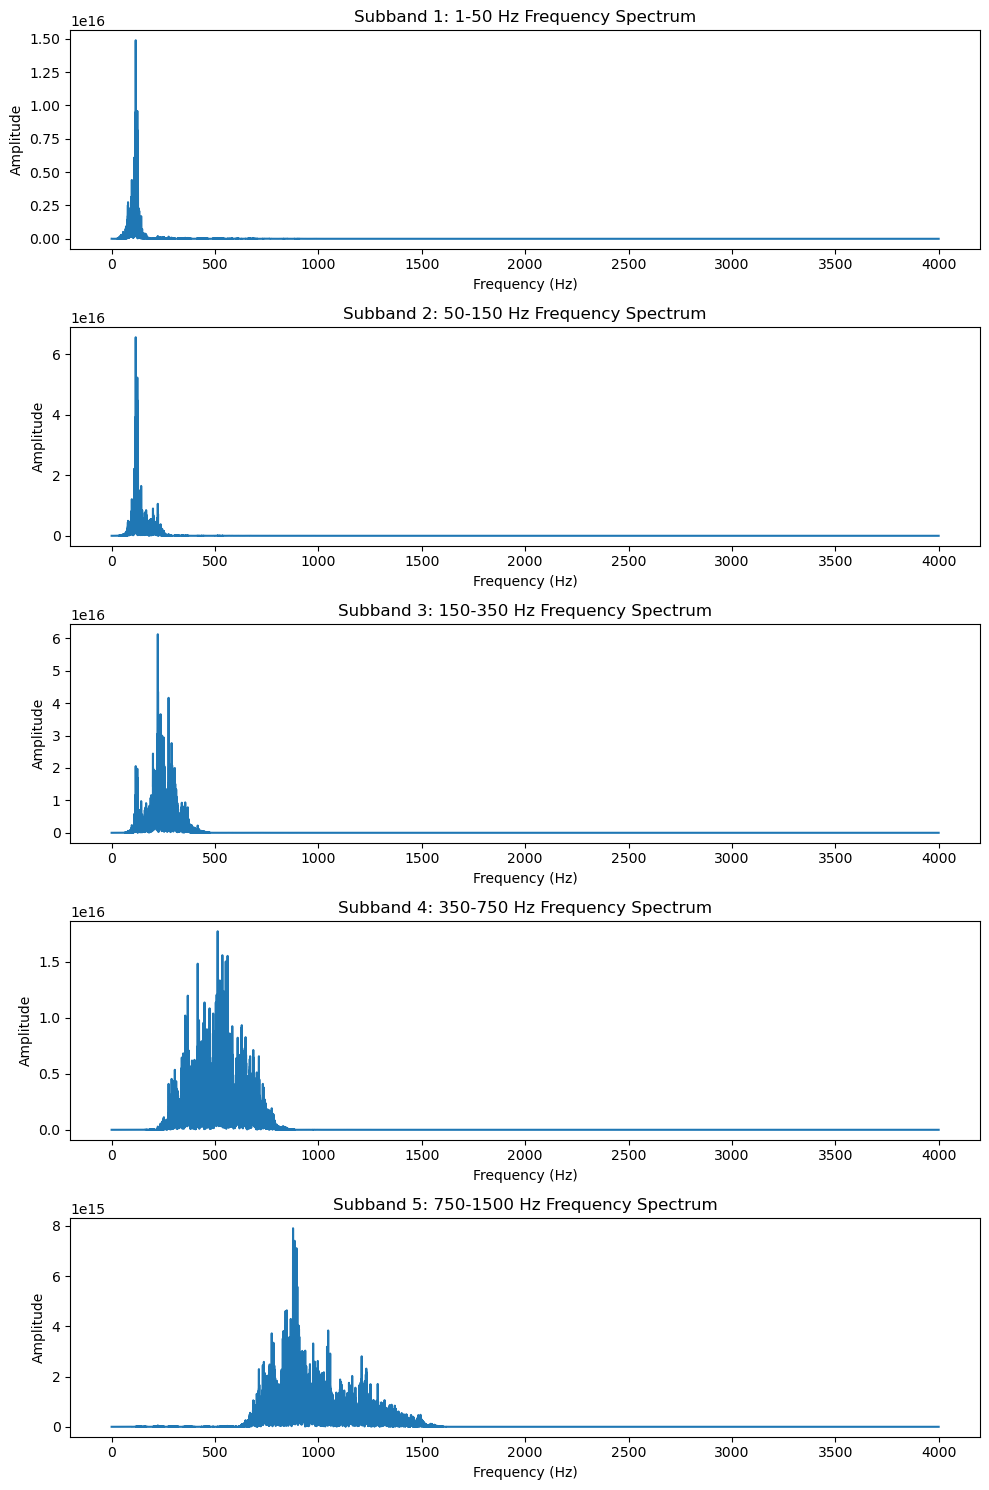

72
24
10
4
2
72
24
10
4
2


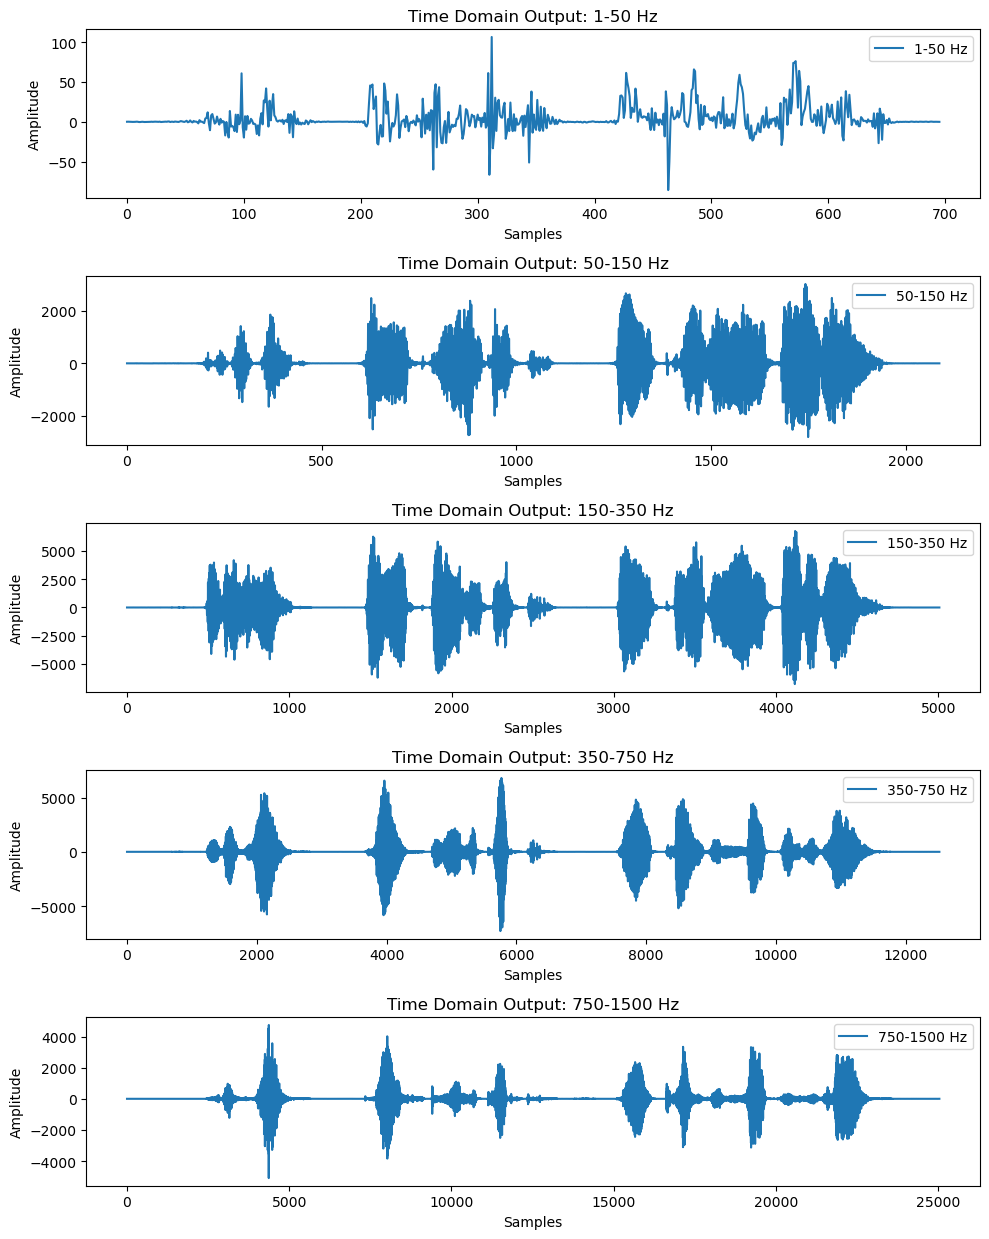

In [2]:
from scipy.signal import firwin
from scipy.signal import lfilter
from scipy.signal import firwin, lfilter, resample, decimate


def apply_filters(filters, signal):
    subbands = [lfilter(f, 1.0, signal) for f in filters]
    return subbands

def plot_filtered_signals(subbands, fs, filter_ranges):
    """
    Applies bandpass filters to the signal and plots the filtered outputs in the time domain.
    
    Parameters:
    signal: Input signal (1D array)
    fs: Sampling frequency (Hz)
    filter_ranges: List of tuples with cutoff frequencies [(low_cutoff, high_cutoff), ...]
    """
    fig, axes = plt.subplots(len(filter_ranges), 1, figsize=(10, len(filter_ranges) * 2.5))
    
    for i, (low_cutoff, high_cutoff) in enumerate(filter_ranges):      
        # Plot the filtered signal in the time domain
        axes[i].plot(subbands[i], label=f'{low_cutoff}-{high_cutoff} Hz')
        axes[i].legend()
        axes[i].set_title(f'Time Domain Output: {low_cutoff}-{high_cutoff} Hz')
        axes[i].set_xlabel('Samples')
        axes[i].set_ylabel('Amplitude')
    
    plt.tight_layout()
    plt.show()

def create_filters(filter_ranges, num_taps, fs):
    filters = []
    for cutoff in filter_ranges:
        coeffs = firwin(num_taps, [cutoff[0]/(fs/2), cutoff[1]/(fs/2)], pass_zero=False)
        filters.append(coeffs)
    return filters

def plot_subbands(subbands, fs, filter_ranges):
    """
    Plots the frequency spectrum of each subband with the corresponding cutoff frequencies in the title.

    Parameters:
    subbands: List of subband signals to plot
    fs: Sampling frequency
    filter_ranges: List of frequency ranges (low_cutoff, high_cutoff) for each filter
    """
    fig, ax = plt.subplots(len(subbands), 1, figsize=(10, len(subbands) * 3))
    
    for i, (subband, (low_cutoff, high_cutoff)) in enumerate(zip(subbands, filter_ranges)):
        # Compute frequency spectrum
        freqs = np.fft.rfftfreq(len(subband), 1 / fs)
        spectrum = np.abs(np.fft.rfft(subband))
        
        # Plot spectrum\
        ax[i].plot(freqs, spectrum)
        ax[i].set_title(f"Subband {i + 1}: {low_cutoff}-{high_cutoff} Hz Frequency Spectrum")
        ax[i].set_xlabel("Frequency (Hz)")
        ax[i].set_ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()

def resample_to_nyquist(subbands, fs):
    nyquist_rate = fs / 2
    resampled_subbands = []
    
    for subband in subbands:
        # Calculate new number of samples for the Nyquist frequency
        num_samples = len(subband) // 2
        resampled_subband = resample(subband, num_samples)
        resampled_subbands.append(resampled_subband)
    
    return resampled_subbands

def resample_subbands(subbands, fs, filter_ranges):
    """Resamples each subband based on 2x the max cutoff frequency."""
    resampled_subbands = []
    
    for subband, (low_cutoff, high_cutoff) in zip(subbands, filter_ranges):
        # Calculate the new sampling rate: 2 * max_cutoff
        fs_new = 2.2 * high_cutoff
        decimation_factor = int(fs / fs_new)  # Calculate the decimation factor
        print(decimation_factor)
        # Apply decimation (downsampling) to the subband signal
        resampled_subband = decimate(subband, decimation_factor)
        resampled_subbands.append(resampled_subband)
    
    return resampled_subbands

filter_ranges = [
    # 1–250 Hz: Focus on the low end
    (1, 50), 
    
    # 50–500 Hz: Broader range to capture mid-lows
    (50, 150), 
    
    # 150–750 Hz: Expanding further for mid-range frequencies
    (150, 350), 
    
    # 350–1000 Hz: Capturing the higher mid-range frequencies
    (350, 750), 
    
    # 750–1500 Hz: Covering the high frequencies
    (750, 1500),
]

num_taps = 101  # Adjust based on desired filter length
fs = 8000  # Sampling frequency of the signal

filters = create_filters(filter_ranges, num_taps, fs)
anechoic_subband_signals = apply_filters(filters, anechoic_audio)
echoed_subband_signals = apply_filters(filters, anechoic_audio_impulse_response_convolution)
plot_subbands(echoed_subband_signals, fs, filter_ranges)
# Resample each subband based on the 2x maximum cutoff frequency of the respective filter range
anechoic_subband_signals = resample_subbands(anechoic_subband_signals, fs, filter_ranges)
echoed_subband_signals = resample_subbands(echoed_subband_signals, fs, filter_ranges)

plot_filtered_signals(anechoic_subband_signals, fs, filter_ranges)


In [3]:
for subband in anechoic_subband_signals:
    print(len(subband))

696
2087
5008
12520
25040


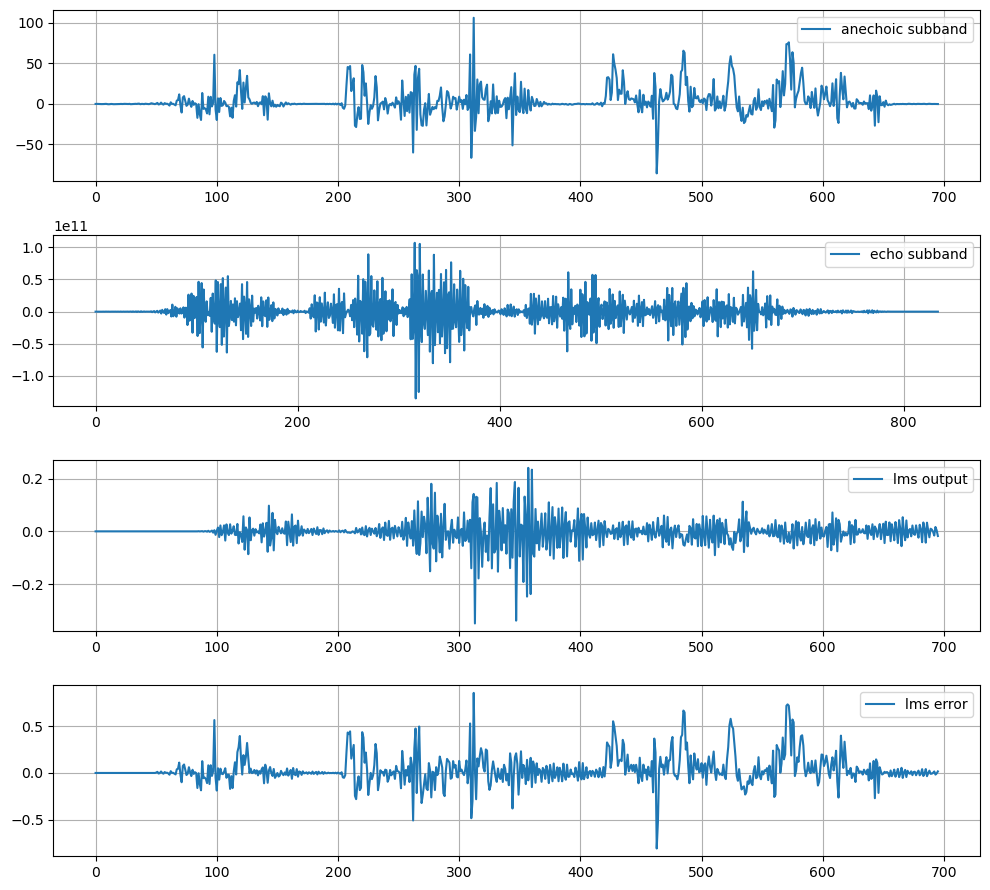

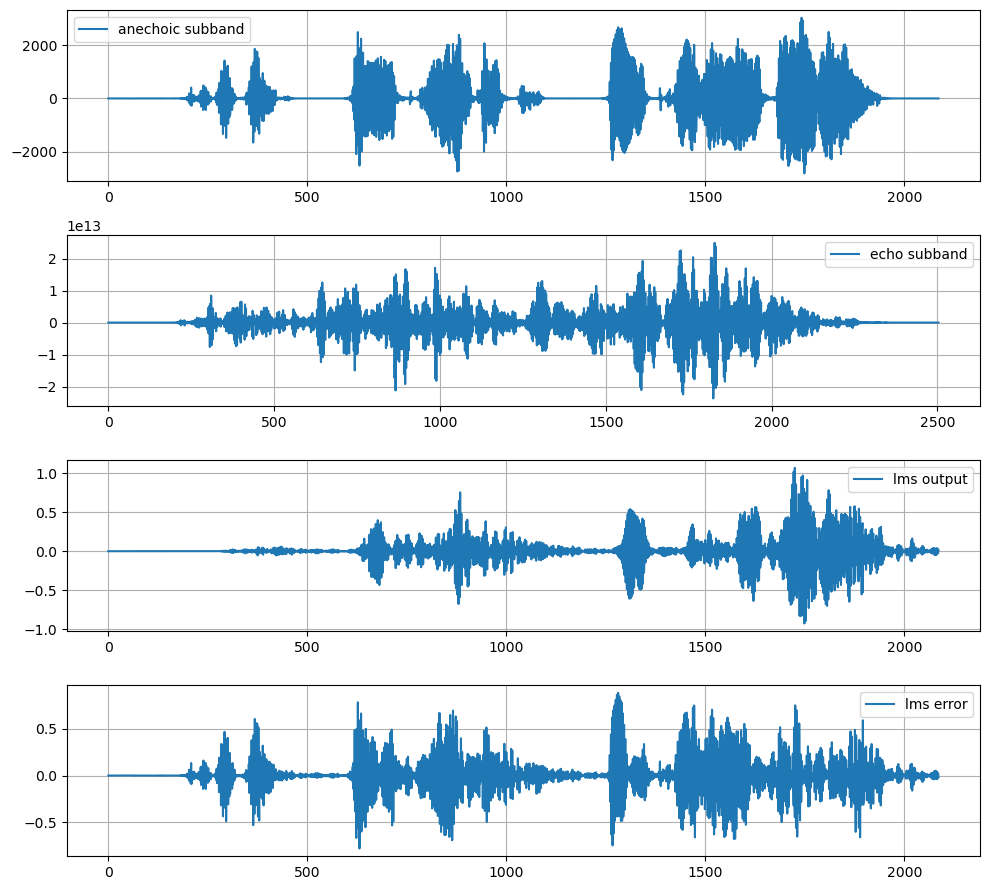

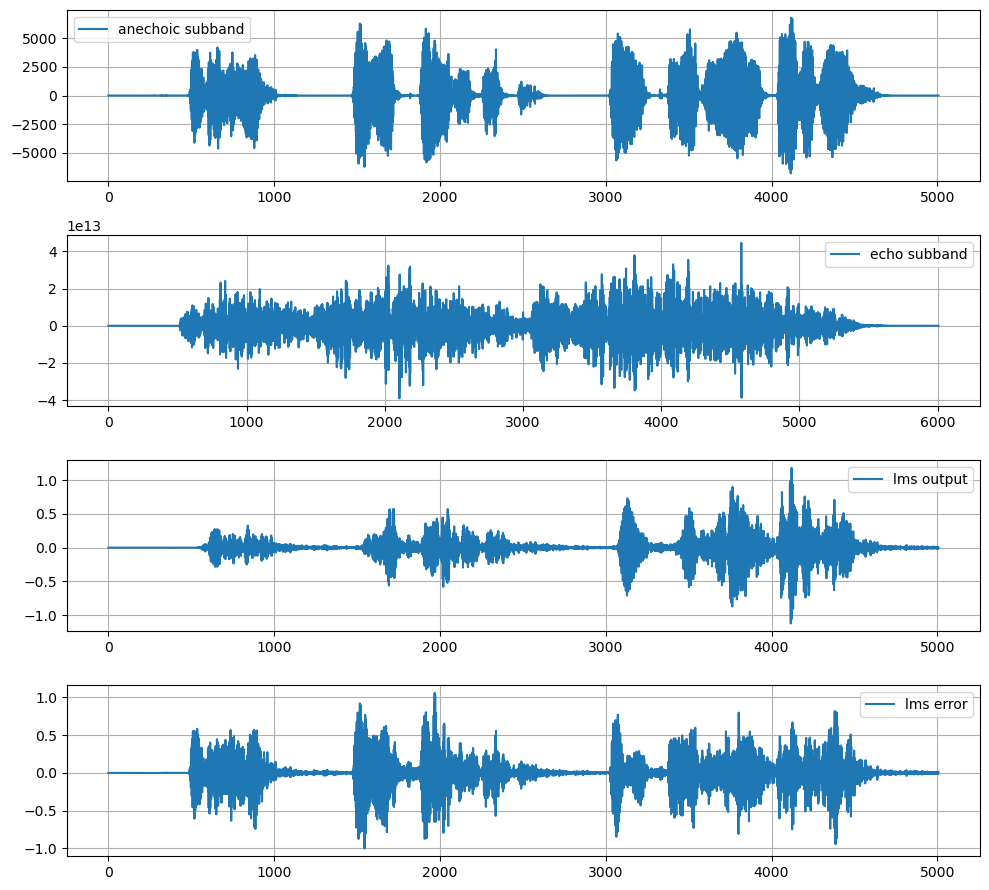

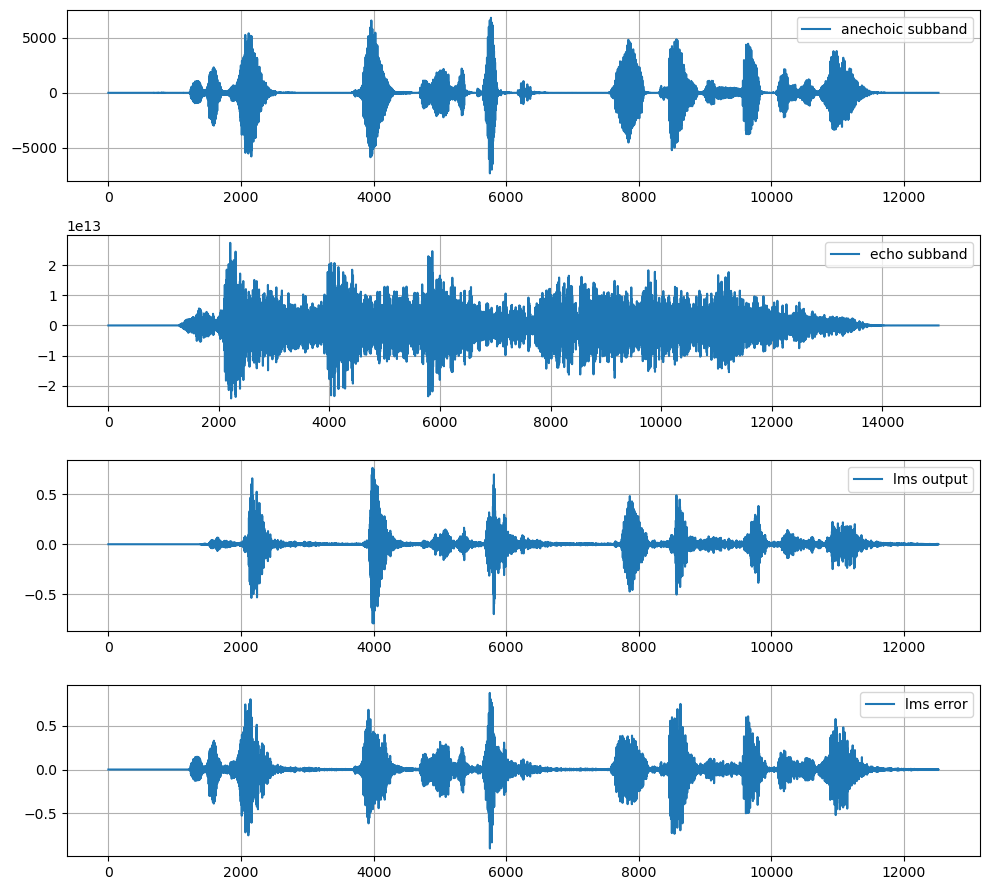

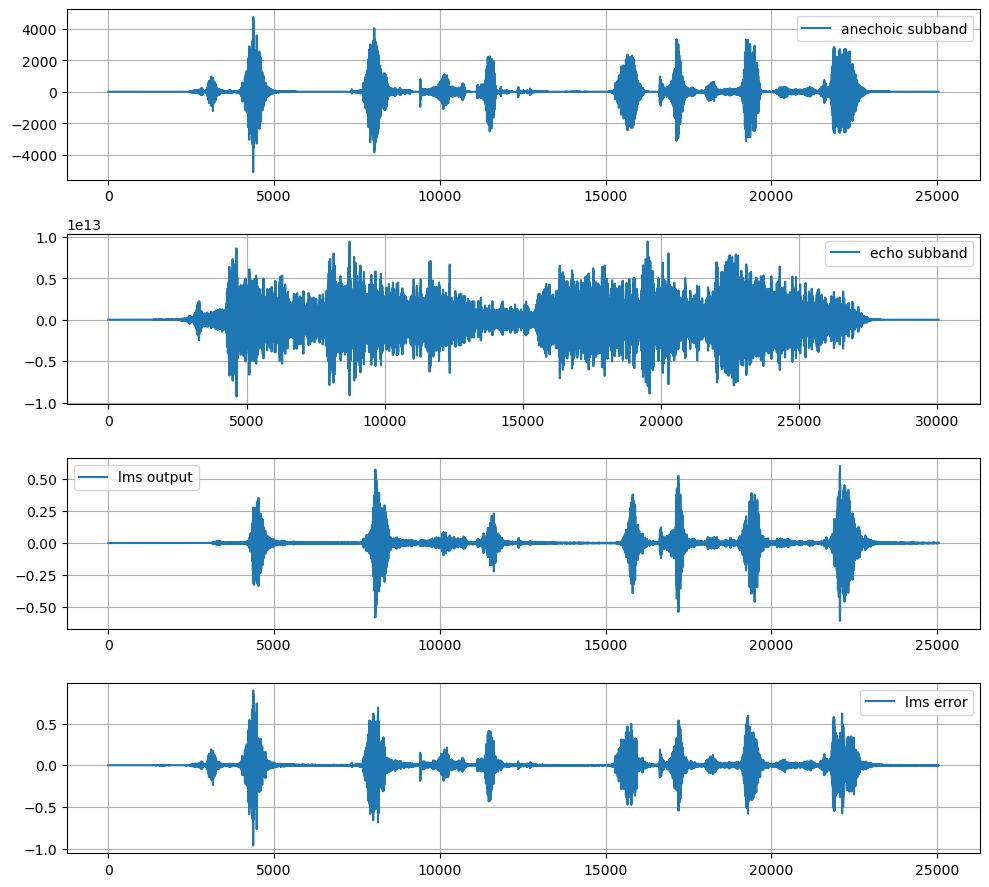

In [4]:
import numpy as np

def apply_lms_filters(desired_signal, input_subbands, num_taps, mu):
    """
    Applies LMS filtering on each subband.
    
    Parameters:
    desired_signal: List of subbanded desired signals.
    input_subbands: List of subbanded input signals.
    num_taps: Number of filter coefficients (filter length).
    mu: Step size for the LMS algorithm.
    
    Returns:
    output_signals: List of filtered signals for each subband.
    errors: List of error signals for each subband.
    weights: List of final filter weights for each subband.
    """
    output_signals = []
    errors = []
    weights = []
    weights_evolution = []
    
    for desired, input_ in zip(desired_signal, input_subbands):
        output_signal, weight, weight_evolution, error = lms(desired, input_, mu, num_taps)
        plot_signals([(desired, "anechoic subband"), (input_, "echo subband"), (output_signal, "lms output"), (error, "lms error")])
        output_signals.append(output_signal)
        errors.append(error)
        weights.append(weight)
        weights_evolution.append(weight_evolution)
    
    return output_signals, errors, weights

# Example Usage
num_taps = 50  # Length of the LMS filter
mu = 0.1  # Step size
output_signals, errors, weights = apply_lms_filters(
    anechoic_subband_signals, echoed_subband_signals, num_taps, mu
)


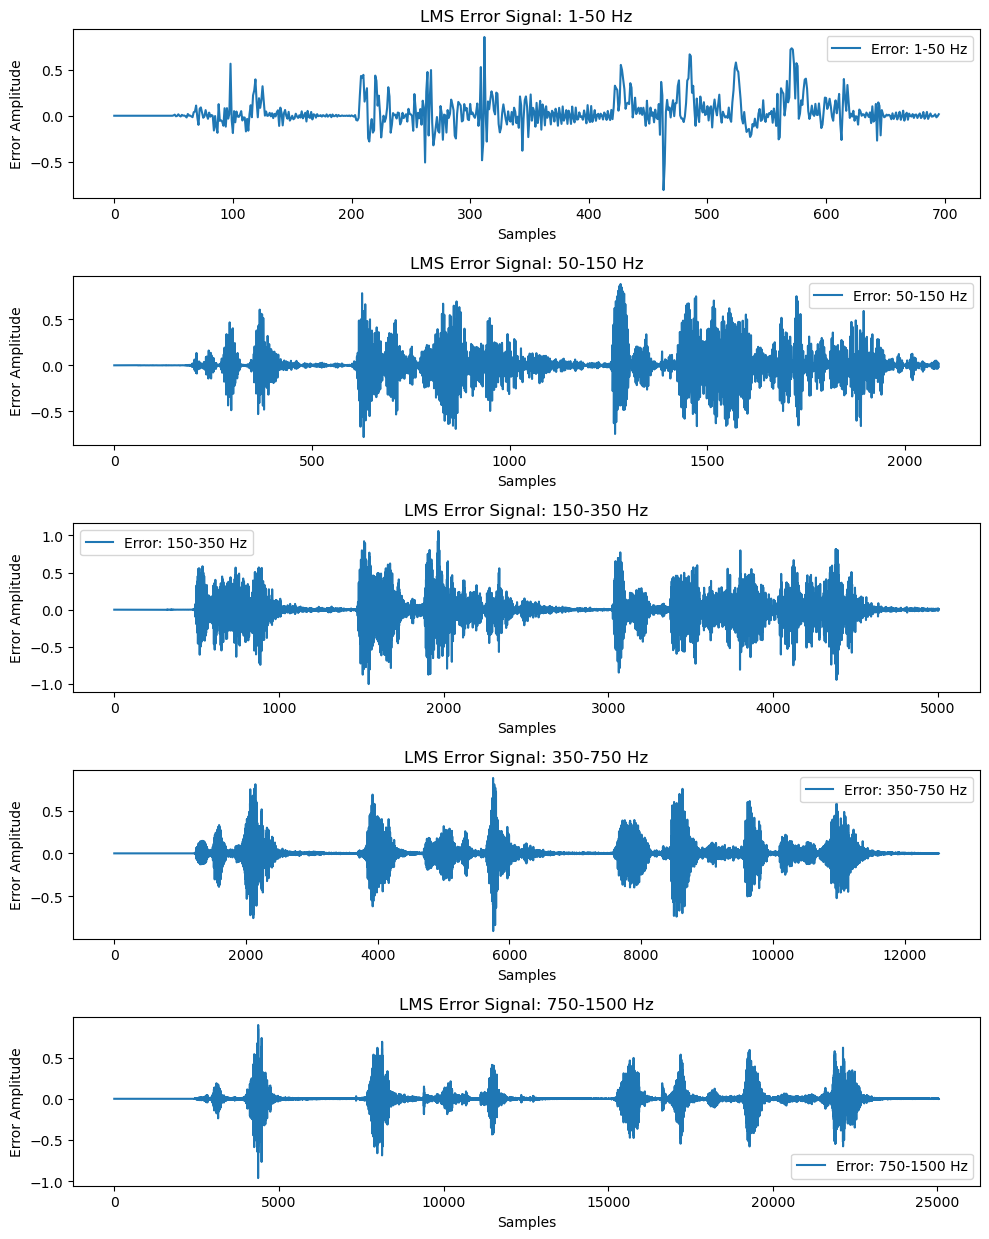

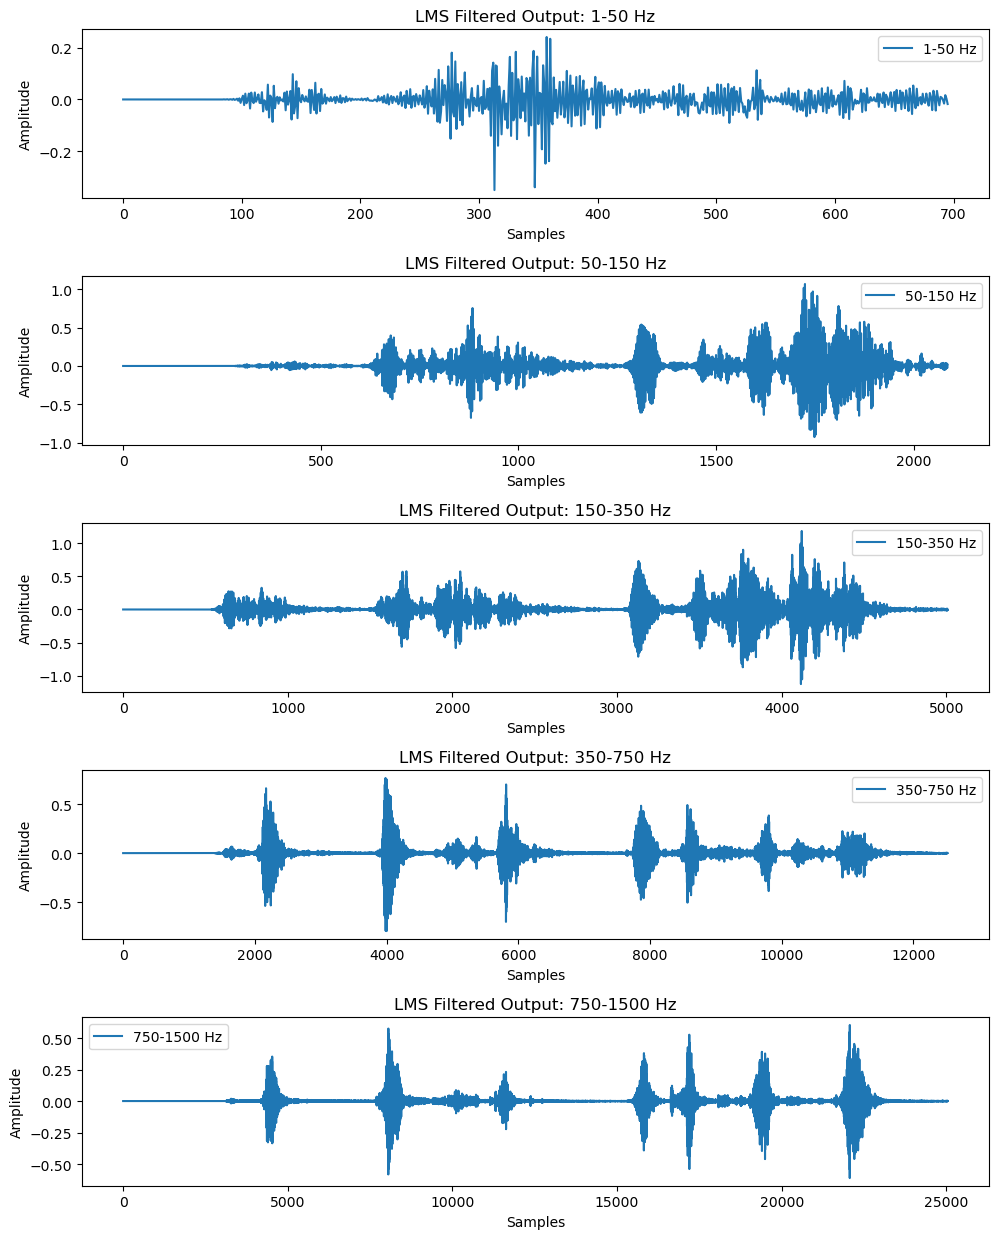

In [5]:
def plot_lms_errors(errors, filter_ranges):
    """
    Plots the error signals for each subband after LMS filtering.

    Parameters:
    errors: List of error signals for each subband.
    filter_ranges: List of tuples with cutoff frequencies [(low_cutoff, high_cutoff), ...].
    """
    fig, axes = plt.subplots(len(errors), 1, figsize=(10, len(errors) * 2.5))
    
    for i, (error, (low_cutoff, high_cutoff)) in enumerate(zip(errors, filter_ranges)):
        axes[i].plot(error, label=f'Error: {low_cutoff}-{high_cutoff} Hz')
        axes[i].legend()
        axes[i].set_title(f'LMS Error Signal: {low_cutoff}-{high_cutoff} Hz')
        axes[i].set_xlabel('Samples')
        axes[i].set_ylabel('Error Amplitude')
    
    plt.tight_layout()
    plt.show()

def plot_lms_filtered_signals(filtered_signals, fs, filter_ranges):
    """
    Plots the LMS-filtered outputs in the time domain for each subband.

    Parameters:
    filtered_signals: List of filtered signals for each subband.
    fs: Sampling frequency (Hz).
    filter_ranges: List of tuples with cutoff frequencies [(low_cutoff, high_cutoff), ...].
    """
    fig, axes = plt.subplots(len(filtered_signals), 1, figsize=(10, len(filtered_signals) * 2.5))
    
    for i, (filtered_signal, (low_cutoff, high_cutoff)) in enumerate(zip(filtered_signals, filter_ranges)):
        axes[i].plot(filtered_signal, label=f'{low_cutoff}-{high_cutoff} Hz')
        axes[i].legend()
        axes[i].set_title(f'LMS Filtered Output: {low_cutoff}-{high_cutoff} Hz')
        axes[i].set_xlabel('Samples')
        axes[i].set_ylabel('Amplitude')
    
    plt.tight_layout()
    plt.show()

# Plot error signals
plot_lms_errors(errors, filter_ranges)

# Plot LMS-filtered signals
plot_lms_filtered_signals(output_signals, fs, filter_ranges)


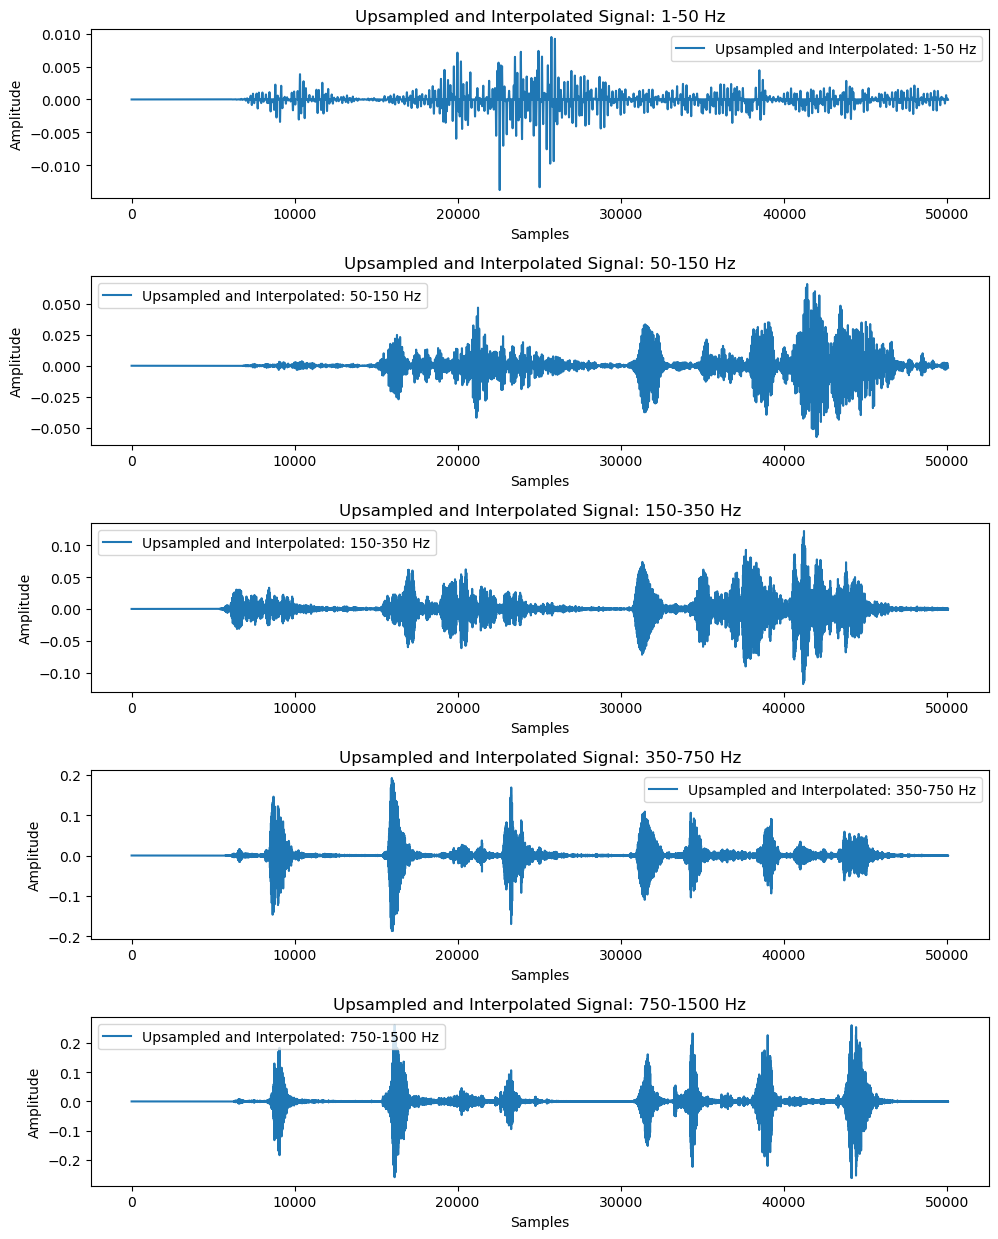

In [6]:
from scipy.signal import firwin, upfirdn, lfilter
import numpy as np
import matplotlib.pyplot as plt

def create_synthesizer_filter(num_taps, fs, target_fs, low_cutoff, high_cutoff):
    """
    Create a synthesizer FIR filter for interpolation.
    
    Parameters:
    num_taps: Number of filter coefficients.
    fs: Original sampling frequency.
    target_fs: Target sampling frequency (after upsampling).
    low_cutoff, high_cutoff: Cutoff frequencies for the filter.
    
    Returns:
    Synthesizer filter coefficients.
    """
    # Normalize cutoff frequencies based on the Nyquist frequency of the target sampling rate
    nyquist_target = target_fs / 2
    normalized_cutoff = [low_cutoff / nyquist_target, high_cutoff / nyquist_target]
    
    # Create the FIR filter for interpolation (bandpass filter)
    return firwin(num_taps, normalized_cutoff, pass_zero=False)

def upsample_and_interpolate(filtered_signals, num_taps, fs, target_fs, filter_ranges):
    """
    Upsample and interpolate each subband's LMS output to the target sampling rate.
    
    Parameters:
    filtered_signals: List of filtered signals (LMS output).
    num_taps: Number of filter taps for the interpolation filter.
    fs: Original sampling frequency.
    target_fs: Target sampling frequency (after upsampling).
    filter_ranges: List of tuples with cutoff frequencies [(low_cutoff, high_cutoff), ...].
    
    Returns:
    List of upsampled and interpolated signals.
    """
    upsampled_signals = []
    
    for filtered_signal, (low_cutoff, high_cutoff) in zip(filtered_signals, filter_ranges):
        # Calculate upsampling factor based on downsampling to 2.2 * high_cutoff
        downsampled_freq = 2.2 * high_cutoff
        upsample_factor = target_fs / downsampled_freq
        
        # Upsample by zero-padding (insert zeros between samples)
        upsampled_signal = upfirdn([1], filtered_signal, upsample_factor)
        
        # Create synthesizer filter (for interpolation)
        synth_filter = create_synthesizer_filter(num_taps, fs, target_fs, low_cutoff, high_cutoff)
        
        # Apply the synthesizer filter to the upsampled signal
        interpolated_signal = lfilter(synth_filter, 1.0, upsampled_signal)
        
        upsampled_signals.append(interpolated_signal)
    
    return upsampled_signals

def plot_upsampled_signals(upsampled_signals, fs, target_fs, filter_ranges):
    """
    Plots the upsampled signals after interpolation for each subband.
    
    Parameters:
    upsampled_signals: List of upsampled and interpolated signals.
    fs: Original sampling frequency.
    target_fs: Target sampling frequency (after upsampling).
    filter_ranges: List of tuples with cutoff frequencies [(low_cutoff, high_cutoff), ...].
    """
    fig, axes = plt.subplots(len(upsampled_signals), 1, figsize=(10, len(upsampled_signals) * 2.5))
    
    for i, (upsampled_signal, (low_cutoff, high_cutoff)) in enumerate(zip(upsampled_signals, filter_ranges)):
        axes[i].plot(upsampled_signal, label=f'Upsampled and Interpolated: {low_cutoff}-{high_cutoff} Hz')
        axes[i].legend()
        axes[i].set_title(f'Upsampled and Interpolated Signal: {low_cutoff}-{high_cutoff} Hz')
        axes[i].set_xlabel('Samples')
        axes[i].set_ylabel('Amplitude')
    
    plt.tight_layout()
    plt.show()

# Example Usage:
# Set target sampling frequency (after upsampling)
target_fs = 8000  # Example, 2x the original fs

# Apply upsampling and interpolation
upsampled_signals = upsample_and_interpolate(output_signals, num_taps, fs, target_fs, filter_ranges)

# Plot the upsampled and interpolated signals
plot_upsampled_signals(upsampled_signals, fs, target_fs, filter_ranges)


In [18]:
from scipy.signal import firwin, upfirdn
import numpy as np

def upsample_subband(subband, fs_new, filter_range, num_taps, fs_original):
    """
    Upsample a subband signal by inserting zeros between samples and applying a reconstruction filter.
    
    Parameters:
    subband: The subband signal to upsample.
    fs_new: The target sampling frequency.
    filter_range: A tuple with the low and high cutoff frequencies for the filter.
    num_taps: Number of filter taps for the reconstruction filter.
    fs_original: The original sampling frequency before downsampling.
    
    Returns:
    upsampled_subband: The upsampled subband signal.
    """
    # Ensure num_taps is odd
    if num_taps % 2 == 0:
        num_taps += 1

    # Calculate the upsampling factor
    # Downsample was done to 2.2 * high_cutoff, now we upsample to fs_new (16000)
    upsample_factor = fs_new / (2.2 * filter_range[1])
    
    # Design a low-pass filter for reconstruction (synthesizer filter)
    cutoff = filter_range[1]  # Use the high cutoff of the subband filter range
    coeffs = firwin(num_taps, cutoff / (fs_new / 2), pass_zero=False)
    
    # Upsample the subband by inserting zeros between samples
    upsampled_subband = np.zeros(len(subband) * int(upsample_factor))
    upsampled_subband[::int(upsample_factor)] = subband  # Insert zeros between samples
    
    # Apply the synthesis filter to the upsampled subband
    upsampled_subband = upfirdn(coeffs, upsampled_subband)
    
    return upsampled_subband

# List of filter ranges for each subband
upsampled_subbands = []
for subband, filter_range in zip(output_signals, filter_ranges):
    upsampled_subband = upsample_subband(subband, 8000, filter_range, num_taps, fs)
    upsampled_subbands.append(upsampled_subband)

for subband in upsampled_subbands:
    print(len(subband))

# Find the maximum length of all upsampled subbands
max_length = max(len(subband) for subband in upsampled_subbands)

# Pad all subbands to the maximum length
padded_subbands = [np.pad(subband, (0, max_length - len(subband)), 'constant') for subband in upsampled_subbands]

# Now, you can synthesize the full signal by summing the padded subbands
reconstructed_signal = np.sum(padded_subbands, axis=0)

# Check the length of each upsampled subband
for subband in padded_subbands:
    print(len(subband))


50162
50138
50130
50130
50130
50162
50162
50162
50162
50162


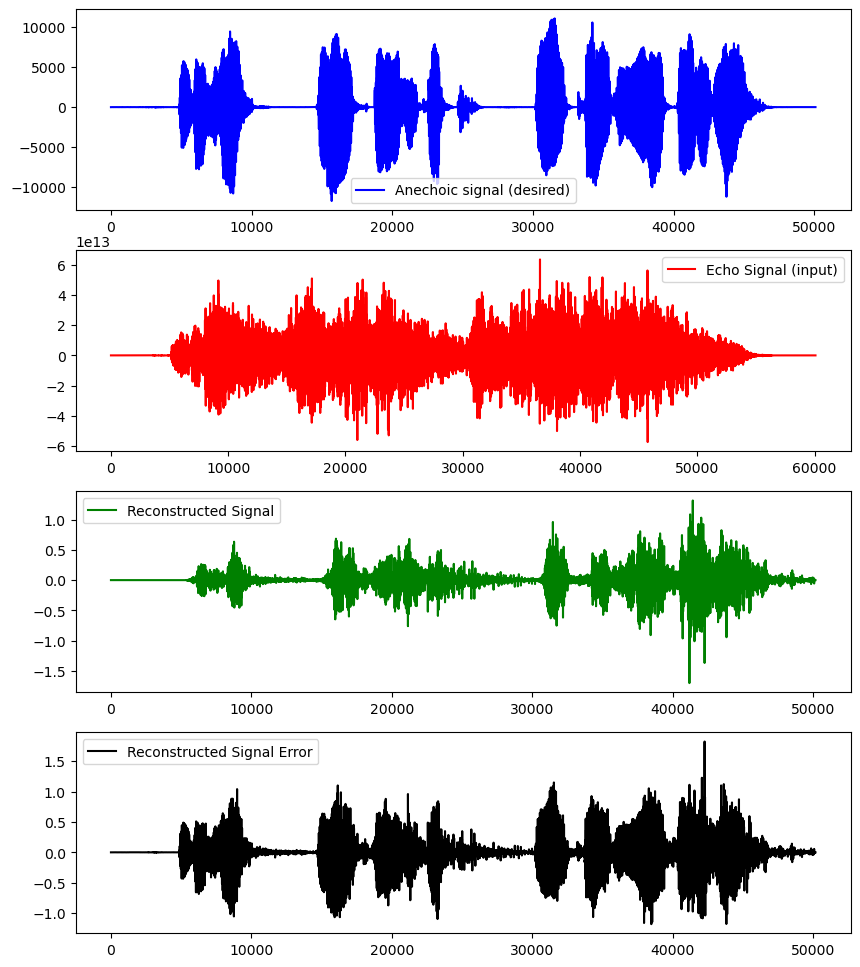

In [16]:
# Plot the results
fig, ax = plt.subplots(4, 1, figsize=(10, 12))
ax[0].plot(anechoic_audio, color='blue', label='Anechoic signal (desired)')
ax[0].legend()
ax[1].plot(anechoic_audio_impulse_response_convolution, color='red', label='Echo Signal (input)')
ax[1].legend()
ax[2].plot(reconstructed_signal, color='green', label='Reconstructed Signal')
ax[2].legend()
error = normalize(np.concatenate([anechoic_audio, np.zeros(82)])) - reconstructed_signal
ax[3].plot(error, color='black', label='Reconstructed Signal Error')
ax[3].legend()

In [17]:
print(np.mean(error**2))

0.041791347844195754
